Building the CNN  model by using keras.....

4-Convolution layers

2-Dense for nn-hidden and output

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
# Building CNN model using keras

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# now 4 convolution layers are  added
# now adding  flatten layer for 1D input NN
model.add(Flatten())

#model.summary()

#Adding  Dense or hidden layers for  our  NN (Fully connected layers)

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.50))

# adding  output  layer with 1 output  since it is binary classification

model.add(Dense(1,activation='sigmoid'))

#compling model with all layers

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [4]:
#To make data ready for keras
# Training data images of x-ray 
# Normalizing data  by rescaling size of imageand adding some augmnentation to train data like shear,zoom etc
# by keeping horizontal_flip = True becoz not invert the x-ray

train_datagen= image.ImageDataGenerator(
               rescale=1./255,
               shear_range=0.2,
               zoom_range=0.2,
               horizontal_flip=True
               )

#just applying rescaling

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [7]:
import os
import shutil
# to remove extra class indices '.ipynb_checkpoints'
#shutil.rmtree('output/train/.ipynb_checkpoints')
#shutil.rmtree('output/val/.ipynb_checkpoints')

In [8]:
# actual application of generators 
# on objects  (here train_datagen)
train_generator = train_datagen.flow_from_directory(
    'output/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
 )




Found 231 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
# for test dataset 

validation_generator= test_dataset.flow_from_directory(
    'output/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
    
)


Found 58 images belonging to 2 classes.


In [11]:
validation_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [12]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 24s 3s/step - loss: 0.8926 - accuracy: 0.5541 - val_loss: 0.6576 - val_accuracy: 0.8103
Epoch 2/10
8/8 [==============================] - 26s 3s/step - loss: 0.5522 - accuracy: 0.7316 - val_loss: 0.4613 - val_accuracy: 0.9655
Epoch 3/10
8/8 [==============================] - 27s 3s/step - loss: 0.3687 - accuracy: 0.8312 - val_loss: 0.2701 - val_accuracy: 0.9483
Epoch 4/10
8/8 [==============================] - 25s 3s/step - loss: 0.2579 - accuracy: 0.9134 - val_loss: 0.1785 - val_accuracy: 0.9655
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.2431 - accuracy: 0.9048 - val_loss: 0.1772 - val_accuracy: 0.9655
Epoch 6/10
8/8 [==============================] - 26s 3s/step - loss: 0.2527 - accuracy: 0.9177 - val_loss: 0.1498 - val_accuracy: 0.9828
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.2178 - accuracy: 0.9091 - val_loss: 0.1404 - val_accuracy: 0.9828
Epoch 8/10
8/8 [==================

loss is  decreasing 

## Saving the model

In [13]:
model.save('model_mk.h5')

In [14]:
model.evaluate_generator(train_generator)

[0.04488437622785568, 0.9567099809646606]

In [15]:
model.evaluate_generator(validation_generator)

[0.04527151212096214, 0.982758641242981]

Here 95%  accuracy from test data .

and 98% accuracy  from validation /test  data

## Testing  the images

In [19]:
# load and evaluate a saved model
from keras.models import load_model


model= load_model('model_mk.h5')

In [20]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
y_actual= []
y_test = []

In [22]:
for i in os.listdir("./output/val/Normal/"):
    img= image.load_img("./output/val/Normal/"+i,target_size=(224,224))
    img= image.img_to_array(img)
    img= np.expand_dims(img,axis=0)
    p= model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)
    

In [23]:
for i in os.listdir("./output/val/Covid/"):
    img= image.load_img("./output/val/Covid/"+i,target_size=(224,224))
    img= image.img_to_array(img)
    img= np.expand_dims(img,axis=0)
    p= model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [24]:
y_actual=np.array(y_actual)
y_test= np.array(y_test)

In [25]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_actual,y_test)

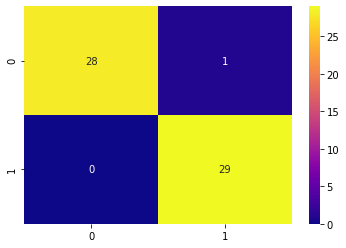

In [26]:
import seaborn as sns

sns.heatmap(cm,cmap='plasma',annot=True)